In [126]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.image import extract_patches

In [66]:
# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
for example in ds.take(1):
  images, labels = example["image"], example["label"]

2022-05-16 12:17:14.568193: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


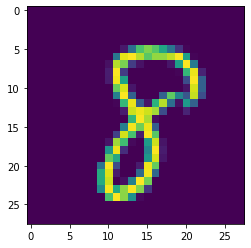

In [141]:
test_image = images[0,:,:,0].numpy()
plt.imshow(test_image)

In [142]:
test_image.shape

(28, 28)

In [143]:
test_image = np.expand_dims(test_image, axis=0)
test_image = np.expand_dims(test_image, axis=-1)
test_image.shape

(1, 28, 28, 1)

## Stride is grater than size

In [149]:
sizes = [1, 5, 5, 1]
strides = [1, 3, 3, 1]
depth = test_image.shape[3]

patches = extract_patches(images=test_image,
                                 sizes=sizes,
                                 strides=strides,
                                 rates=[1, 1, 1, 1],
                                 padding='VALID')

print(patches.shape)

(1, 8, 8, 25)


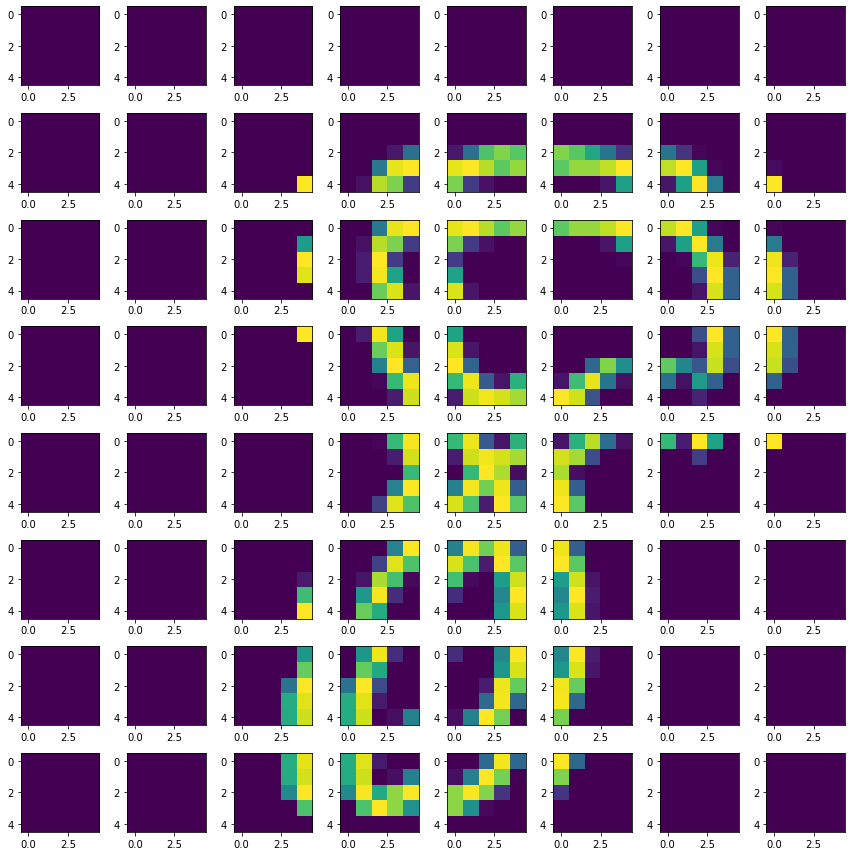

In [150]:
fig, ax = plt.subplots(nrows=patches.shape[1],ncols=patches.shape[2], figsize=(12,12))

for patch_idx in range(patches.shape[1]):
    for patch_idy in range(patches.shape[2]):
        r = patches[0,patch_idx,patch_idy,:].numpy().reshape(sizes[1], sizes[2], depth)
        ax[patch_idx][patch_idy].imshow(r)

plt.tight_layout()
plt.show()

## Stride is equal to size

In [151]:
sizes = [1, 5, 5, 1]
strides = [1, 5, 5, 1]
depth = test_image.shape[3]

patches = extract_patches(images=test_image,
                                 sizes=sizes,
                                 strides=strides,
                                 rates=[1, 1, 1, 1],
                                 padding='VALID')

print(patches.shape)

(1, 5, 5, 25)


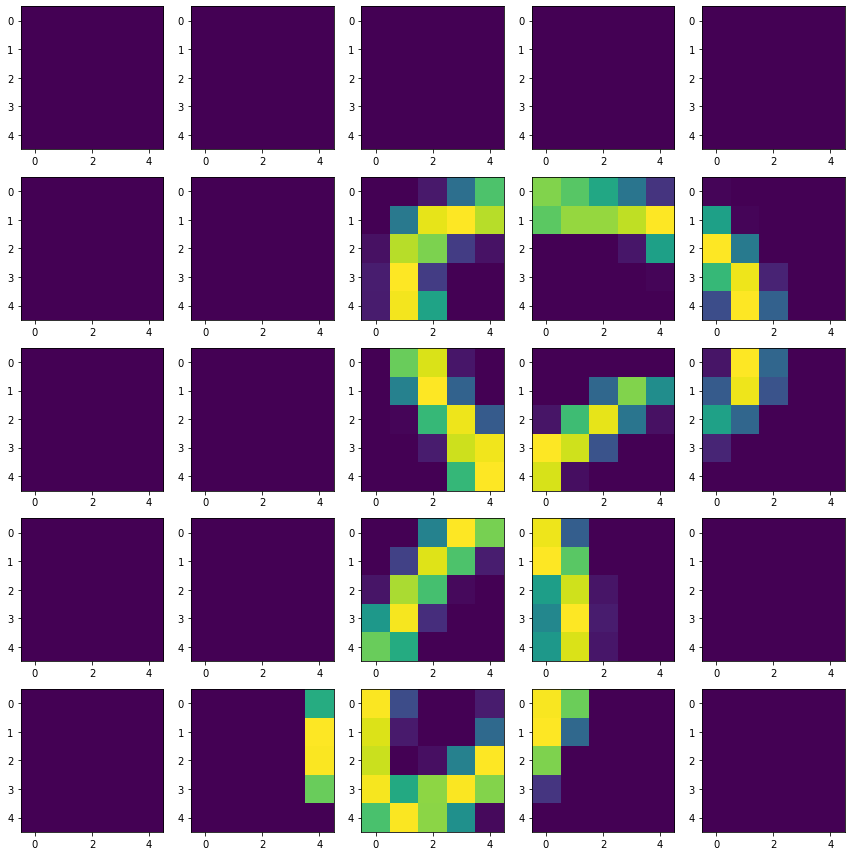

In [152]:
fig, ax = plt.subplots(nrows=patches.shape[1],ncols=patches.shape[2], figsize=(12,12))

for patch_idx in range(patches.shape[1]):
    for patch_idy in range(patches.shape[2]):
        r = patches[0,patch_idx,patch_idy,:].numpy().reshape(sizes[1], sizes[2], depth)
        ax[patch_idx][patch_idy].imshow(r)

plt.tight_layout()
plt.show()